# Introduction
Welcome to Mastering Stock Price Visualization with mplfinance! 
📈 In this notebook, we will explore various methods to visualize stock price data using the powerful mplfinance library. 
Whether you are a seasoned trader, a data enthusiast, or a beginner in the world of financial data analysis, this notebook will provide you with the tools and knowledge to effectively plot and analyze stock price trends.

mplfinance is a versatile library that leverages the capabilities of Matplotlib to create beautiful and informative financial plots. By the end of this notebook, you'll be equipped with the skills to create a variety of stock charts, including line charts, candlestick charts, and more advanced visualizations like moving averages and volume overlays.

### Let's dive in and start our journey to becoming proficient in stock price visualization! 🚀

# 1. Getting Started
#### To begin, let's ensure that we have all the necessary libraries installed and import them into our notebook.
#### We'll need yfinance to fetch stock price data and mplfinance for visualization.

In [1]:
!pip install yfinance
!pip install mplfinance
import warnings
import mplfinance as mpf
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 38.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=293378 sha256=d18707bf29799c48ebb74de6abb08e73d438e68292eb19263c6bdf618a442a34
  Stored in directory: /root/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00


# 2. Loading Stock Price Data
#### In this section, we will fetch the stock price data for a specific ticker symbol. For demonstration purposes, we'll use the ticker symbol for Bitcoin (BTC-USD). 
#### You can replace it with any other stock or cryptocurrency symbol of your choice.

In [2]:
data=pd.read_csv("/kaggle/input/bitcoin-price-history-btc-usd/BTC-USD.csv")
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)
data=data.tail(150)

# Define parameters
symbol = 'BTC-USD'
end_date = datetime.utcnow()
start_date = end_date - timedelta(days=10)
interval = '5m'  # 5 minutes

# Fetch historical data
intraday_df = yf.download(tickers=symbol, start=start_date, end=end_date, interval=interval)

[*********************100%%**********************]  1 of 1 completed


# 3. Basic Line Chart
#### Let's start with a simple line chart to visualize the closing prices of the stock over time. 📉

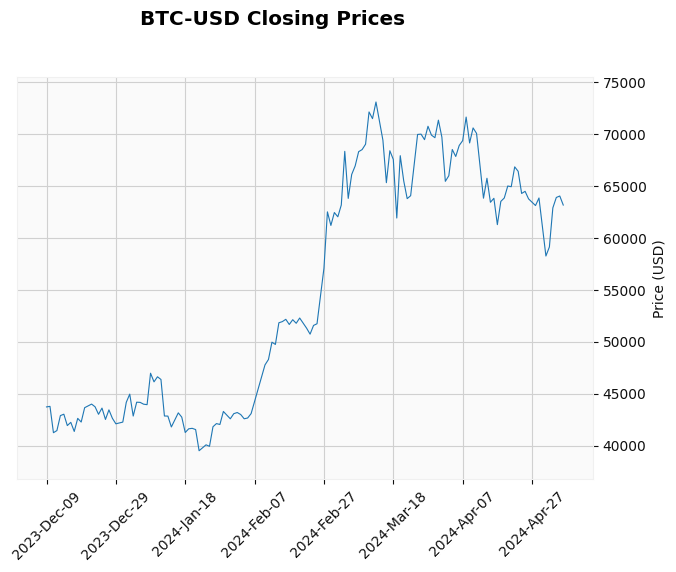

In [3]:
mpf.plot(data, type='line', title='BTC-USD Closing Prices', ylabel='Price (USD)', style='yahoo')

# 4. Candlestick Chart
#### Candlestick charts provide a more detailed view of price movements, showing the open, high, low, and close prices for each time period. 🕯️

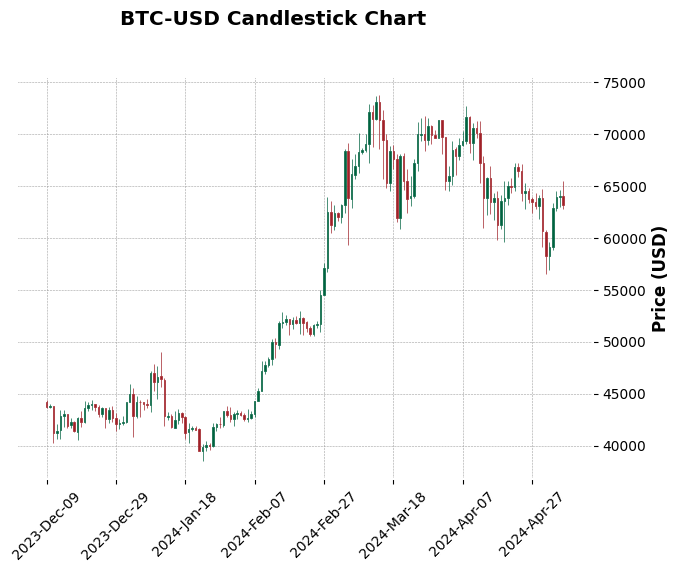

In [4]:
mpf.plot(data, type='candle', title='BTC-USD Candlestick Chart', ylabel='Price (USD)', style='charles')

# 5.Renko Chart
#### A Renko chart displays price movement by focusing on significant changes in price, using bricks of a fixed size to filter out minor fluctuations and highlight trends.

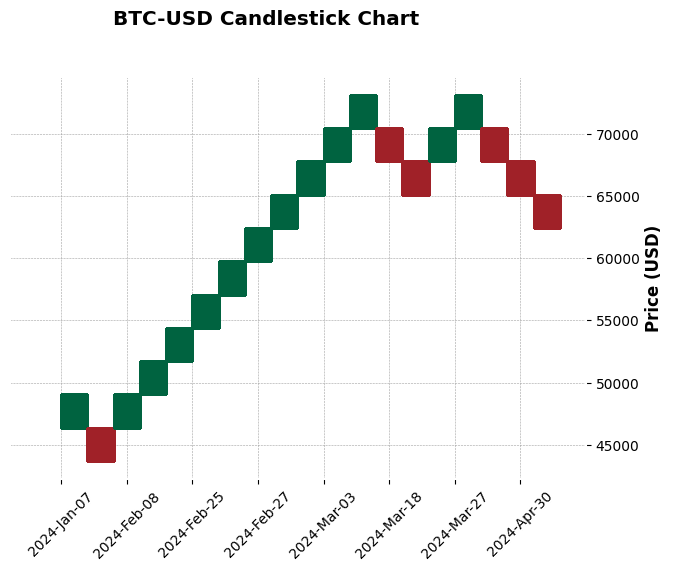

In [5]:
mpf.plot(data, type='renko', title='BTC-USD Candlestick Chart', ylabel='Price (USD)', style='charles')

# 6.Pnf Chart

#### A Point and Figure (PNF) chart is a type of financial chart that represents price movements using X's and O's, with each column of X's representing price increases and each column of O's representing price decreases. It filters out noise and focuses on significant price movements, helping traders identify trends and key support/resistance levels more easily.

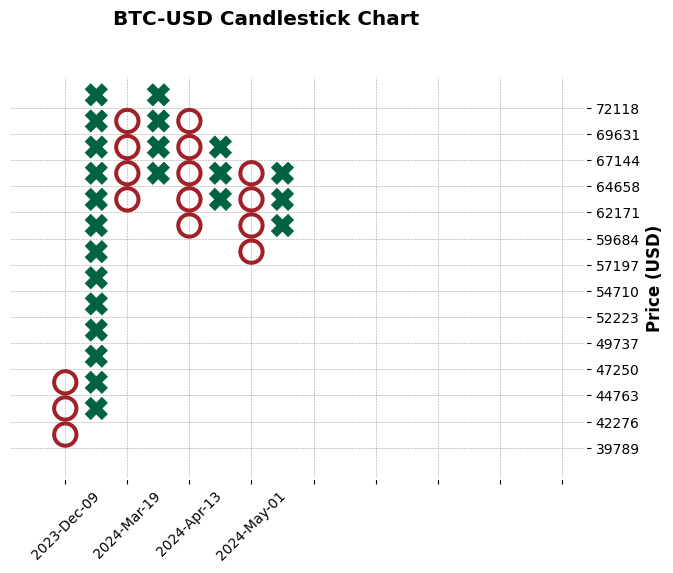

In [6]:
mpf.plot(data, type='pnf', title='BTC-USD Candlestick Chart', ylabel='Price (USD)', style='charles')

# 7. Adding Moving Averages
#### Moving averages help smooth out price data and identify trends. Let's add 20-day and 50-day moving averages to our candlestick chart. 📈

##### We can also plot moving averages with the mav keyword

1. use a scalar for a single moving average
2. use a tuple or list of integers for multiple moving averages

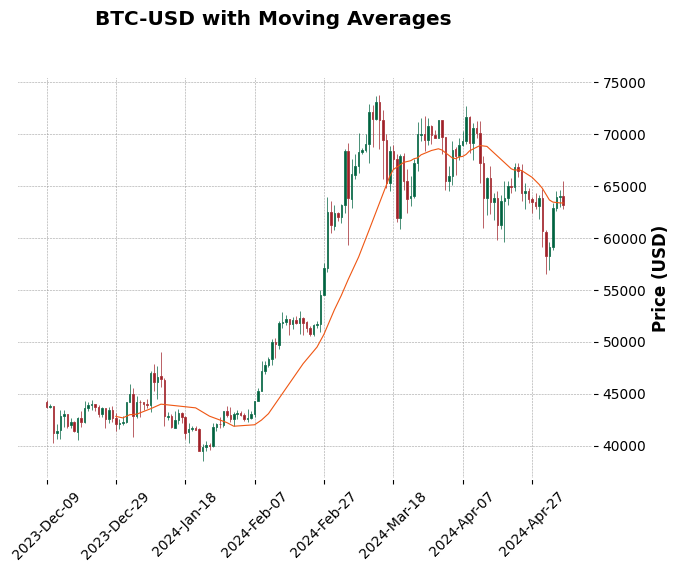

In [7]:
mpf.plot(data, type='candle', title='BTC-USD with Moving Averages', ylabel='Price (USD)', style='charles',
         mav=21)

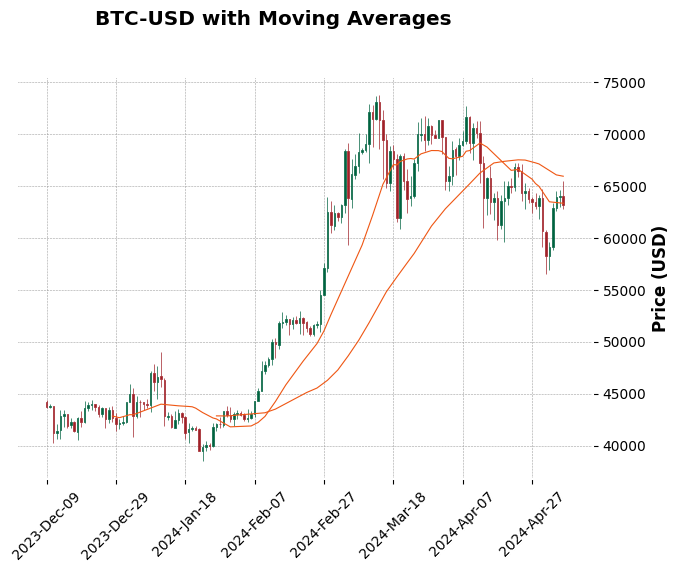

In [8]:
mpf.plot(data, type='candle', title='BTC-USD with Moving Averages', ylabel='Price (USD)', style='charles',
         mav=(20, 50))

# 8. Volume Overlay
#### Including volume data in your chart can provide insights into the strength of price movements. Let's overlay the volume on our candlestick chart. 📊

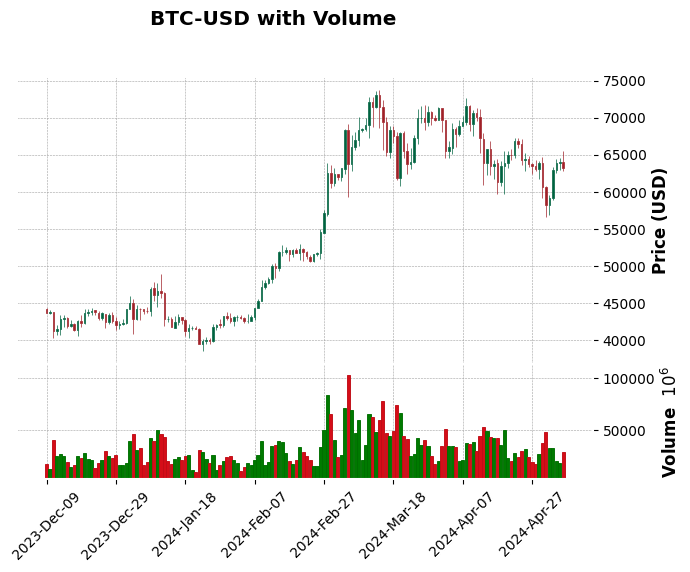

In [9]:
mpf.plot(data, type='candle', title='BTC-USD with Volume', ylabel='Price (USD)', style='charles',
         volume=True)

# 9. Intraday

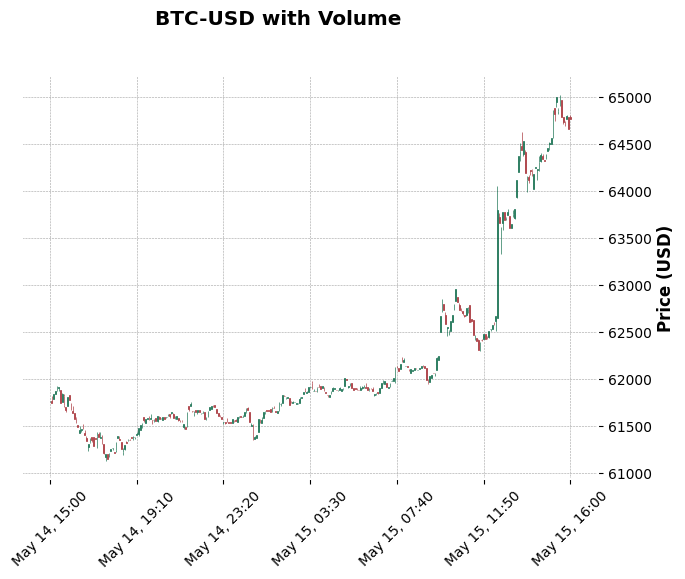

In [10]:
#intraday_df = intraday_df.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
intraday_df.index.name = 'Date'

iday = intraday_df.loc['2024-05-14 15:00':'2024-05-15 16:00',:]
#mpf.plot(iday,type='candle',mav=(7,12))
mpf.plot(iday, type='candle', title='BTC-USD with Volume', ylabel='Price (USD)', style='charles')

# 10. Customizing Your Charts
#### Customization allows you to make your charts more informative and visually appealing. We'll explore how to change colors, add gridlines, and more. 🎨

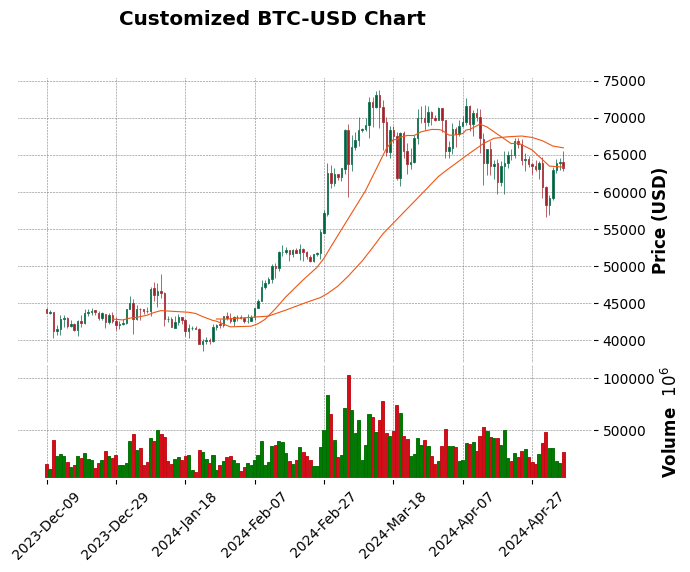

In [11]:
custom_style = mpf.make_mpf_style(base_mpf_style='charles', gridcolor='gray', gridstyle='--')
mpf.plot(data, type='candle', title='Customized BTC-USD Chart', ylabel='Price (USD)', style=custom_style,
         volume=True, mav=(20, 50))

# 11. Advanced Techniques
#### In this section, we will explore more advanced visualization techniques, such as adding technical indicators like Bollinger Bands and MACD. 📉📈

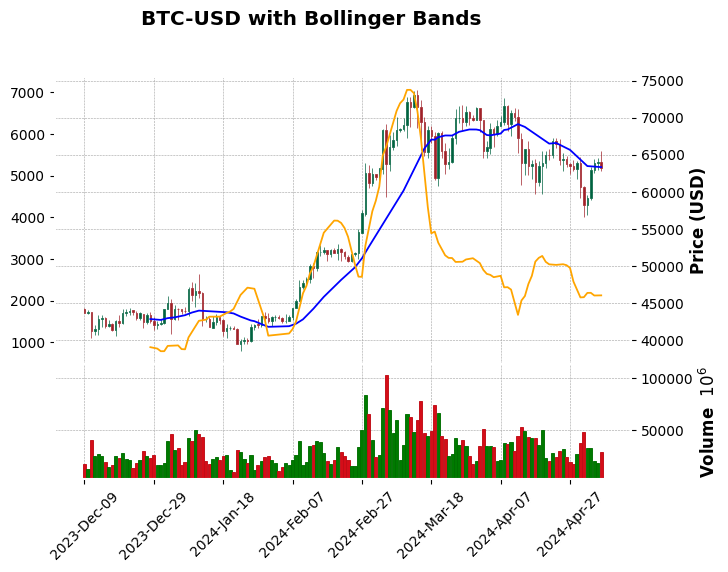

In [12]:
# Add Bollinger Bands
ap0 = [mpf.make_addplot(data['Close'].rolling(window=20).mean(), color='blue'),
       mpf.make_addplot(data['Close'].rolling(window=20).std(), color='orange')]

mpf.plot(data, type='candle', title='BTC-USD with Bollinger Bands', ylabel='Price (USD)', style='charles',
         addplot=ap0, volume=True)

# 12. Conclusion
#### Congratulations! 🎉 You've learned how to use the mplfinance library to visualize stock price data in various ways. From basic line charts to advanced technical analysis, you now have a comprehensive toolkit for analyzing financial data. Keep experimenting and refining your skills to become a master of stock price visualization.

#### Feel free to customize and expand this notebook with additional techniques and personal insights. The world of financial data visualization is vast and ever-evolving, so there's always something new to learn and explore.

## Happy charting! 📊🚀

# 🚀 Next Steps
### Fork this Notebook: Try making some changes and experiment with different ticker symbols or visualization techniques.
### Upvote: If you found this notebook useful, please give it an upvote.
### [Follow Me](https://www.kaggle.com/saswattulo): Stay updated with my latest notebooks and tutorials by following my Kaggle profile.
### Thank you for your support! Happy coding and data visualization! 😊